In [1]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
from  matplotlib import pyplot
import numpy as np
pd.options.mode.chained_assignment = None  # default='warn'
from scipy import stats


In [2]:
pj_file = 'pj_time.csv'

In [3]:
pj_data = pd.read_csv(pj_file, names=["EMPLOYEE","DATE", "AFTER HOURS CLICKS", "HIRE DATE", "TERM DATE", "INDICATOR"])

In [4]:
pj_data['DATE']= pd.to_datetime(pj_data['DATE'])
pj_data['TERM DATE']= pd.to_datetime(pj_data['TERM DATE'])
pj_data["TERM DATE"].fillna(datetime(2020, 11, 8), inplace=True)
pj_data["DAYS FROM HIRE"] = pd.to_datetime(pj_data["DATE"]) - pd.to_datetime(pj_data["HIRE DATE"])
pj_data["DAYS FROM HIRE"] = pj_data["DAYS FROM HIRE"].dt.days

pj_data["DAYS TO TERM"] = pd.to_datetime(pj_data["TERM DATE"]) - pd.to_datetime(pj_data["DATE"])
pj_data["DAYS TO TERM"] = pj_data["DAYS TO TERM"].dt.days

#pj_data['SMOOTHED AFTER HOURS CLICKS'] = pj_data['AFTER HOURS CLICKS'].rolling(10).mean()

In [5]:
pj_data = pj_data.loc[pj_data['DATE'] >= datetime(2019, 1, 1)] #cone did not use ebas before 2019

In [6]:
neg_data = pj_data.loc[pj_data['INDICATOR'] == 0]
pos_data = pj_data.loc[pj_data['INDICATOR'] == 1]

In [7]:
print(len(pos_data.groupby(['EMPLOYEE']).size()),len(neg_data.groupby(['EMPLOYEE']).size()))

1387 8438


In [8]:
neg_avg_clicks = []
for label, df in neg_data.groupby(["EMPLOYEE"]):
    time_mask = (df['DATE'] >= '2020-01-01') & (df['DATE'] <= '2020-06-01')
    
    df_masked = df[time_mask]
    
    avg_pj_clicks = np.around(df_masked['AFTER HOURS CLICKS'].mean(), decimals=1)
    if np.isnan(avg_pj_clicks):
        continue
    else:
        neg_avg_clicks.append(avg_pj_clicks)

In [9]:
np.mean(neg_avg_clicks) #Average after hours clicks for employees NOT term

202.62634560906514

In [10]:
np.std(neg_avg_clicks)

328.10423322422815

In [11]:
pos_avg_clicks_earlier = []
pos_avg_clicks_recent = []
for label, df in pos_data.groupby(["EMPLOYEE"]):
    term_date = df["TERM DATE"].iloc[0]
    start_time = term_date -  pd.Timedelta('180 days')
    middle_time = term_date -  pd.Timedelta('90 days')
        
    time_mask_earlier = (df['DATE'] >= start_time) & (df['DATE'] < middle_time)
    time_mask_recent = (df['DATE'] >= middle_time) & (df['DATE'] <= term_date)
    
    df_masked_earlier = df[time_mask_earlier]
    df_masked_recent = df[time_mask_recent]
    
    #print(df_masked_earlier['AFTER HOURS CLICKS'])
    #print(df_masked_recent['AFTER HOURS CLICKS'])
    
    avg_pj_clicks_earlier = np.around(df_masked_earlier['AFTER HOURS CLICKS'].mean(), decimals=1)
    if np.isnan(avg_pj_clicks_earlier):
        continue
    else: 
        pos_avg_clicks_earlier.append(avg_pj_clicks_earlier)
    
    avg_pj_clicks_recent = np.around(df_masked_recent['AFTER HOURS CLICKS'].mean(), decimals=1)
    if np.isnan(avg_pj_clicks_recent):
        pos_avg_clicks_recent.append(0)
    else:
        pos_avg_clicks_recent.append(avg_pj_clicks_recent)

In [13]:
np.mean(pos_avg_clicks_earlier) #avg after hours clicks for term employees 180-90 days before term

201.19224489795917

In [14]:
np.std(pos_avg_clicks_earlier)

293.8191002548205

In [15]:
np.mean(pos_avg_clicks_recent)  #avg after hours clicks for term employees 90-0 days before term

194.12602040816327

In [16]:
np.std(pos_avg_clicks_recent)

298.23892576816075

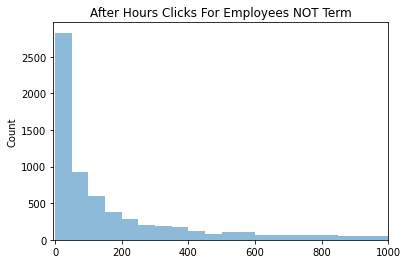

In [17]:
bins = np.arange(0, 2000, 50) 

plt.xlim([-5, 1000])

plt.hist(neg_avg_clicks, bins=bins, alpha=0.5)
plt.title('After Hours Clicks For Employees NOT Term')
#plt.xlabel('')
plt.ylabel('Count')

plt.show()

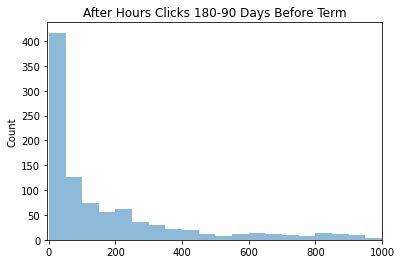

In [18]:
bins = np.arange(0, 2000, 50) 

plt.xlim([-5, 1000])

plt.hist(pos_avg_clicks_earlier, bins=bins, alpha=0.5)
plt.title('After Hours Clicks 180-90 Days Before Term')
#plt.xlabel('')
plt.ylabel('Count')

plt.show()

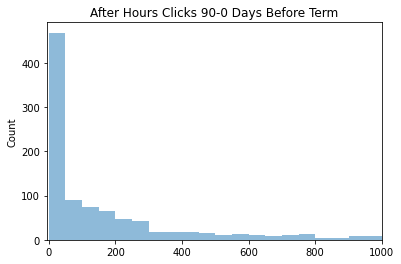

In [19]:
bins = np.arange(0, 2000, 50)

plt.xlim([-5, 1000])

plt.hist(pos_avg_clicks_recent, bins=bins, alpha=0.5)
plt.title('After Hours Clicks 90-0 Days Before Term')
#plt.xlabel('')
plt.ylabel('Count')

plt.show()

In [20]:
#t-test
a = np.array(pos_avg_clicks_earlier)
b = np.array(pos_avg_clicks_recent)

N = len(a)
var_a = a.var(ddof=1)
var_b = b.var(ddof=1)
s = np.sqrt((var_a + var_b)/2)

t = np.around((a.mean() - b.mean())/(s*np.sqrt(2/N)), decimals=2)

#Degrees of freedom
df = 2*N - 2

#p-value after comparison with the t 
p = np.around(1 - stats.t.cdf(t,df=df), decimals=2)

print("t = " + str(t))
print("p = " + str(2*p))

t = 0.53
p = 0.6


In [ ]:
#def countX(lst, x): 
#    return lst.count(x)
#countX(pos_avg_clicks_recent, 0)

#neg_sample = neg_data[:2935]

#pos_sample = pos_data[:1992]

#sample_data = neg_sample.append(pos_sample)

#frames = [neg_data, pos_data, ]

#colors = {1: 'orange', 0: 'blue'}
#fig, ax = plt.subplots(figsize=(10,8))
#neg_data['AVG AFTER HOURS CLICKS'] = (neg_data['AFTER HOURS CLICKS'] - neg_data['AFTER HOURS CLICKS'].min())/(neg_data['AFTER HOURS CLICKS'].max()-neg_data['AFTER HOURS CLICKS'].min())
#label = neg_data["INDICATOR"].iloc[0]
#neg_data.plot.scatter(x='DAYS TO TERM', y='AVG AFTER HOURS CLICKS', color=colors[0], ax=ax, label=label)
#plt.legend("",frameon=False)
#ax.set_xlim(180, 0)
#ax.set_ylim(0, .5)
#ax.set_xlabel("DAYS TO TERM")
#ax.set_ylabel("MIN MAX NORMALIZED AFTER HOURS CLICKS")
#ax.set_title("NOT TERMINATED")

#colors = {1: 'orange', 0: 'blue'}
#fig1, ax1 = plt.subplots(figsize=(10,8))
#pos_data['AVG AFTER HOURS CLICKS'] = (pos_data['AFTER HOURS CLICKS'] - pos_data['AFTER HOURS CLICKS'].min())/(pos_data['AFTER HOURS CLICKS'].max()-pos_data['AFTER HOURS CLICKS'].min())
#label = pos_data["INDICATOR"].iloc[0]
#pos_data.plot.scatter(x='DAYS TO TERM', y='AVG AFTER HOURS CLICKS', color=colors[1], ax=ax1, label=label)
#plt.legend("",frameon=False)
#ax1.set_xlim(180, 0)
#ax1.set_ylim(0, 0.5)
#ax1.set_xlabel("DAYS TO TERM")
#ax1.set_ylabel("MIN MAX NORMALIZED AFTER HOURS CLICKS")
#ax1.set_title("TERMINATED")

#colors = {1: 'orange', 0: 'blue'}
#fig, ax = plt.subplots(figsize=(10,8))
#for label, df in sample_data.groupby(["INDICATOR"]):
#    df['AFTER HOURS VARIANCE'] = (df['AFTER HOURS CLICKS']-df['AFTER HOURS CLICKS'].min())/(df['AFTER HOURS CLICKS'].max()-df['AFTER HOURS CLICKS'].min())
#    df.plot.line(x="DAYS TO TERM", y="AFTER HOURS VARIANCE", color=colors[label], ax=ax, label=label)
#plt.legend(title='INDICATOR', bbox_to_anchor=(1.05, 1), loc='upper left')
#ax.set_ylim(0, 1)
#ax.set_xlim(600, 0)
#ax.set_ylabel("AFTER HOURS VARIANCE")